# OilyGiant oil extraction company <a class="tocSkip"></a>

Predicting the volume of reserves and maximizing expected profits 

## Resumen de la revisión 1 <a class="tocSkip"></a>

----

### Introducción.

En este proyecto vamos a trabajar con los datos de la compañía de extracción de petróleo OilyGiant. 

Nuestra tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Tenemos los datos sobre muestras de crudo de tres regiones. Debemos crear un modelo que ayude a elegir la región con el mayor margen de beneficio. Además de analizar los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

### Inicialización y carga de datos. 

Primero procedemos a importar Librerías:

In [1]:
# Cargamos todas las librerías que ocuparemos en el proyecto:
import pandas as pd # importamos las librerías de pandas
from matplotlib import pyplot as plt # importamos las librerías pyplot de Matplotlib
import numpy as np # importamos la librerías de NumPy, se usa para funciones matemáticas complejas
from scipy import stats as st # importamos el módulo stats de la librería SciPy.
import seaborn as sns # importamos la librería Seaborn para realizar unos gráficos
sns.set_theme() # ocupamos esa librería para tener meejores gráficos
from sklearn.model_selection import train_test_split #importamos la función train_test_split biblioteca scikit-learn
from sklearn.utils import shuffle # importamos la función shuffle de la biblioteca scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Leemos los Conjunto de Datos (DataFrames) con los datos de exploración geológica de las tres regiones:

In [2]:
# Cargamos el DataFrame:
data_0 = pd.read_csv('/datasets/geo_data_0.csv') #cargamos el DataFrame.
data_1 = pd.read_csv('/datasets/geo_data_1.csv') #cargamos el DataFrame.
data_2 = pd.read_csv('/datasets/geo_data_2.csv') #cargamos el DataFrame.

### Preprocesamiento de los datos. 

Primero vamos a revisar la información general de los Conjuntos de Datos de cada una de las regiones.

In [3]:
# Imprimimos la información general/resumida del DataFrame data_0.
data_0.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(data_0.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
----------
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [4]:
# Imprimimos la información general/resumida sobre del DataFrame data_1.
data_1.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(data_1.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
----------
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [5]:
# Imprimimos la información general/resumida sobre del DataFrame data_2.
data_2.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(data_2.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
----------
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


En base al método info podemos ver que los tres Conjuntos de Datos se encuentra conformados por 5 columnas de variables. Todas corresponden a variables numéricas salvo la columna id, identificador único de pozo de petróleo, que es del tipo string.

Por otro lado, al parecer no tenemos presencia de valores ausentes, lo cual confirmaremos más adelante.

In [6]:
# Ocupamos el métod describe para para realizar una exploración rápida inicial de las variables numéricas
# de los tres Conjuntos de datos, cada uno de ellos corresponde a una región.
print(data_0.describe())
print('------------------')
print(data_1.describe())
print('------------------')
print(data_2.describe())
print('------------------')

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
------------------
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      2

Si revisamos las estadísticas descriptivas que nos entrega el método describe, podemos indicar que:

Región 0 (data_0):

product: La media de reservas es de 92.5 miles de barriles, con un máximo de 185.36 miles de barriles.

Región 1 (data_1):

product: La media de reservas es de 68.83 miles de barriles, con un máximo de 137.95 miles de barriles.

Región 2 (data_2):

product: La media de reservas es de 95 miles de barriles, con un máximo de 190.03 miles de barriles.


Estas diferencias en las estadísticas descriptivas pueden influir en el rendimiento de nuestros modelos.

In [7]:
# Verificamos que no hay filas totalmente duplicadas en ninguno de los Dataframes: 
print('El número de filas totalmente duplicadas en el Conjunto de datos Región 0 es:', data_0.duplicated().sum())
print('El número de filas totalmente duplicadas en el Conjunto de datos Región 1 es:', data_1.duplicated().sum())
print('El número de filas totalmente duplicadas en el Conjunto de datos Región 2 es:', data_2.duplicated().sum())
print('------------------')

#Verificamos que no hay valores ausentes en ninguno de los Dataframes.
print("Valores ausentes Región 0", data_0.isna().sum())
print('------------------')
print("Valores ausentes Región 1", data_1.isna().sum())
print('------------------')
print("Valores ausentes Región 2", data_2.isna().sum())
print('------------------')

El número de filas totalmente duplicadas en el Conjunto de datos Región 0 es: 0
El número de filas totalmente duplicadas en el Conjunto de datos Región 1 es: 0
El número de filas totalmente duplicadas en el Conjunto de datos Región 2 es: 0
------------------
Valores ausentes Región 0 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
------------------
Valores ausentes Región 1 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
------------------
Valores ausentes Región 2 id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
------------------


Verificamos que no existen filas totalmente duplicadas no valores ausentes en ninguno de los tres DataFrames.

### Segmentación de los datos DataFrame Región 0 (data_0).

Vamos a trabajar primero con el DataFrame data_0, para el cual vamos a dividir sus datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25. En el paso siguiente, vamos a generar una
función para realizar esto mismo para los 3 Conjuntos de datos.

In [8]:
# El dataset data_0 se divide se divide en el conjunto de entrenamiento (train) y conjunto de validación (valid)
target = 'product'
entity_columns = ['id']
features = [f for f in data_0.columns if f not in [target] + entity_columns]

train, valid = train_test_split(data_0, test_size=0.25, random_state=88)

In [9]:
# Comprobamos que están correctas las caraterísticas (features), que son todos menos las variable objetivo y
# y la columna id.
features

['f0', 'f1', 'f2']

In [10]:
# Imprimimos las formas (shapes) de los conjuntos de datos resultantes, para verificar sus tamaños.
print("Forma del Dataframe:", data_0.shape)
print("Forma del conjunto de entrenamiento:", train[features].shape)
print("Forma del conjunto de validación:", valid[features].shape)

Forma del Dataframe: (100000, 5)
Forma del conjunto de entrenamiento: (75000, 3)
Forma del conjunto de validación: (25000, 3)


Mediante este método shape() confirmamos el tamaño del conjunto de entrenamiento de 75% y el conjunto de validación de 25%.

In [11]:
[len (df)/ len (data_0) for df in [data_0, train, valid]]

[1.0, 0.75, 0.25]

Mediante este cálculo confirmamos los porcentajes de cada conjunto, vemos que el conjunto de entrenamiento tiene un 75% del total y que el conjunto de validación tiene un 25%%  del total.

### Entrenamiento y Pruebas del Modelo en cada Conjunto de Datos. 

A continuación vamos a entrenar el modelo y realizar predicciones para el conjunto de validación para el dataFrame data_0. 

De acuerdo a lo indicado en las condiciones, usaremos la regresión lineal para el entrenamiento del modelo.
Además procederemos a evaluar el modelo, calculando el RMSE, el volumen medio del conjunto de validación y volumen medio de reservas predicho. 

Para luego generar una función de manera de realizarlo para los 3 Conjuntos de datos.

In [12]:
# Creamos el Modelo de Regresión Lineal.
model_0 = LinearRegression()

# Entrenamos el modelo
model_0.fit(train[features], train[target])

 # Hacemos predicciones
preds_0 = model_0.predict(valid[features])

# Evaluamos el modelo
print(f"""
Mean target (valid): {round(valid[target].mean(), 4)}
Mean prediction: {round(preds_0.mean(), 4)}
RMSE: {round(mean_squared_error(valid[target], preds_0)**0.5, 4)}
""")


Mean target (valid): 92.3657
Mean prediction: 92.616
RMSE: 37.3769



A continuación generamos una función que realice los pasos anteriores de segmentación de los datos, entrenar el modelo y realizar predicciones para cada uno de las 3 regiones. Además, ocuparemos esta función para
calcular el RMSE, el volumen medio del comnjunto de validación y volumen medio de reservas predicho.

In [13]:
def train_and_evaluate(data):
    # Dividimos los datos y hacemos una copia independiente
    target = 'product'
    entity_columns = ['id']
    features = [f for f in data.columns if f not in [target] + entity_columns]

    train, valid = train_test_split(data.copy(), test_size=0.25, random_state=88)

    # Entrenamos el modelo
    model = LinearRegression()
    model.fit(train[features], train[target])
    
    # Hacemos predicciones
    preds = model.predict(valid[features])

    # Agregamos la columna 'prediction' a los DataFrames de validación
    valid = valid.copy()  # Hacer una copia para evitar el SettingWithCopyWarning
    valid.loc[:, 'prediction'] = preds
    
    # Evaluamos el modelo
    Mean_target_valid = round(valid[target].mean(), 4)
    Mean_prediction = round(preds.mean(), 4)
    RMSE = round(mean_squared_error(valid[target], preds)**0.5, 4)
    
    return model, preds, valid, Mean_target_valid, Mean_prediction, RMSE

# Entrenamos y evaluamos para cada región
model_0, pred_0, valid_0, Mean_target_valid_0, Mean_prediction_0, RMSE_0 = train_and_evaluate(data_0)
model_1, pred_1, valid_1, Mean_target_valid_1, Mean_prediction_1, RMSE_1 = train_and_evaluate(data_1)
model_2, pred_2, valid_2, Mean_target_valid_2, Mean_prediction_2, RMSE_2 = train_and_evaluate(data_2)

# Mostramos resultados
print(f'Región 0 - RMSE: {RMSE_0}, Mean target (valid): {Mean_target_valid_0}, Mean prediction: {Mean_prediction_0}')
print(f'Región 1 - RMSE: {RMSE_1}, Mean target (valid): {Mean_target_valid_1}, Mean prediction: {Mean_prediction_1}')
print(f'Región 2 - RMSE: {RMSE_2}, Mean target (valid): {Mean_target_valid_2}, Mean prediction: {Mean_prediction_2}')

Región 0 - RMSE: 37.3769, Mean target (valid): 92.3657, Mean prediction: 92.616
Región 1 - RMSE: 0.8976, Mean target (valid): 68.8505, Mean prediction: 68.8414
Región 2 - RMSE: 40.1576, Mean target (valid): 94.9646, Mean prediction: 95.1852


En base a los resultados obtenidos, podemos indicar que lo siguiente:

Rendimiento del Modelo:
La Región 1 tiene un RMSE significativamente más bajo que las otras dos regiones, lo que indica que el modelo de regresión lineal es mucho más preciso en esta región. Esta región presenta una variabilidad mínima en las predicciones en comparación con las observaciones reales.
Las Regiones 0 y 2 tienen RMSE mucho más altos, lo que sugiere que las predicciones en estas regiones son menos precisas y tienen una variabilidad considerable.

Media de las Predicciones vs Media del Objetivo:
En todas las regiones, las medias de las predicciones están bastante cerca de las medias de los objetivos, lo cual es positivo. Sin embargo, el alto RMSE en las Regiones 0 y 2 indica que, aunque las medias sean cercanas, hay una alta dispersión en los valores predichos.

A continuación vamos a realizar unos gráficos para analizar la distribución de las predicciones en comparación con los valores reales para cada región.

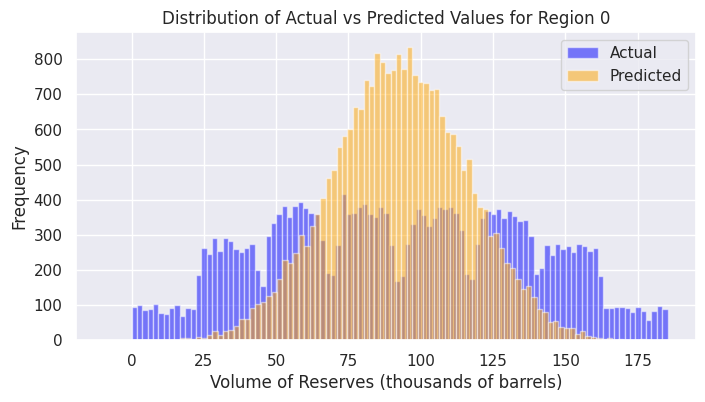

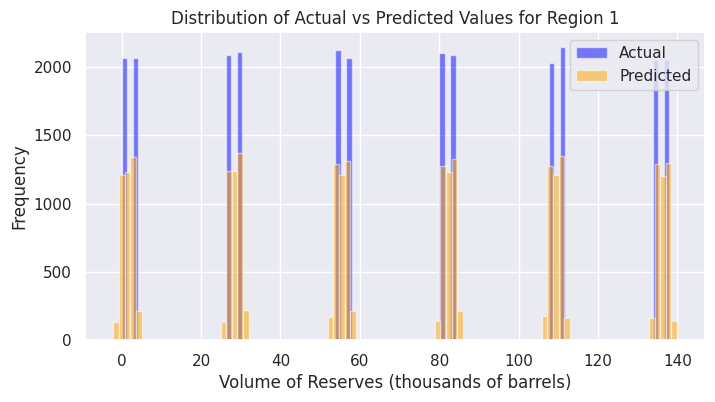

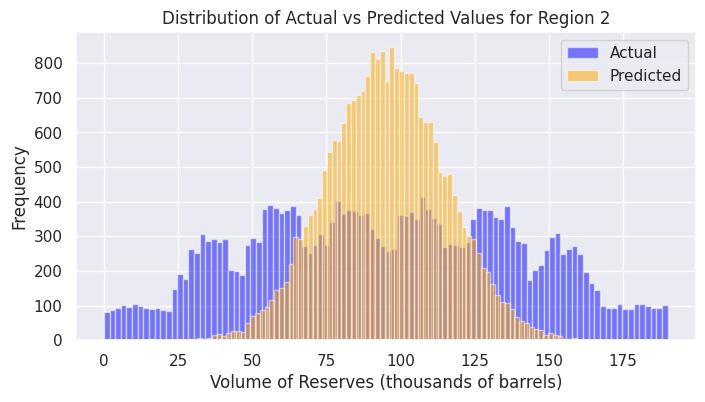

In [14]:
def plot_histograms(valid, preds, region):
    plt.figure(figsize=(8, 4))
    plt.hist(valid['product'], bins=100, alpha=0.5, label='Actual', color='blue')
    plt.hist(preds, bins=100, alpha=0.5, label='Predicted', color='orange')
    plt.title(f'Distribution of Actual vs Predicted Values for Region {region}')
    plt.xlabel('Volume of Reserves (thousands of barrels)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Para la región 0
plot_histograms(valid_0, pred_0, 0)

# Para la región 1
plot_histograms(valid_1, pred_1, 1)

# Para la región 2
plot_histograms(valid_2, pred_2, 2)

Los gráficos generados son útiles para analizar la distribución de las predicciones en comparación con los valores reales para cada región. Podemos indicar los siguientes comentarios:

Para las regiones 0 y 2, sus histogramas muestran que las predicciones del modelo (color naranja) siguen de cerca la distribución de los valores reales (color azul), aunque hay ciertas discrepancias en los extremos.
La superposición entre las predicciones y los valores reales indica que el modelo tiene una buena capacidad para capturar la tendencia general del volumen de reservas en esta región.
La forma de la distribución sugiere que el modelo es razonablemente preciso en capturar la tendencia general del volumen de reservas, aunque hay margen para mejorar en los extremos.

Para la región 1, las predicciones y los valores reales están muy alineados y agrupados en ciertos valores discretos. Esto podría indicar una falta de variabilidad en los datos o la presencia de ciertas características que dominan la producción de reservas.
La alta precisión del modelo en esta región se refleja en un RMSE muy bajo, lo que sugiere que el modelo predice muy bien los valores de producción en esta región.


### Preparación Cálculo de Ganancias. 

Primero vamos a almacenar todos los valores necesarios para los cálculos en variables separadas, considerando que:

 - Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

 - Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). 

In [15]:
# En base a lo indicado en el enunciado, podemos definir las siguiente variables:
inversion_total = 100000000  # 100 millones de dólares
ingreso_por_unidad = 4500  # en dólares por unidad
pozos_por_region = 200
volumen_minimo = (inversion_total / pozos_por_region) / ingreso_por_unidad
print("volumen mínimo",volumen_minimo)

volumen mínimo 111.11111111111111


Comparar esta cantidad la cantidad de unidades mínima para evitar pérdidas con la cantidad media de reservas 
en cada región.

In [16]:
# Definir el valor mínimo de unidades
umbral_minimo_unidades = volumen_minimo

# Calcular la cantidad media de reservas en cada región
cantidad_media_reservas_region_0 = Mean_target_valid_0.mean()
cantidad_media_reservas_region_1 = Mean_target_valid_1.mean()
cantidad_media_reservas_region_2 = Mean_target_valid_2.mean()

print("cantidad_media_reservas_region_0:",cantidad_media_reservas_region_0)
print("cantidad_media_reservas_region_1:",cantidad_media_reservas_region_1)
print("cantidad_media_reservas_region_2:",cantidad_media_reservas_region_2)
print("----------------------------------------------------")

# Presentar conclusiones
print("Comparación Cantidad Media de Reservas con Umbral Mínimo:")
print("Región 0:", "Suficiente" if cantidad_media_reservas_region_0 >= umbral_minimo_unidades else "Insuficiente")
print("Región 1:", "Suficiente" if cantidad_media_reservas_region_1 >= umbral_minimo_unidades else "Insuficiente")
print("Región 2:", "Suficiente" if cantidad_media_reservas_region_2 >= umbral_minimo_unidades else "Insuficiente")

cantidad_media_reservas_region_0: 92.3657
cantidad_media_reservas_region_1: 68.8505
cantidad_media_reservas_region_2: 94.9646
----------------------------------------------------
Comparación Cantidad Media de Reservas con Umbral Mínimo:
Región 0: Insuficiente
Región 1: Insuficiente
Región 2: Insuficiente


Vemos que en ninguna de las regiones el valor medio de las reservas alcanza el volumen mínimo para 
no tener pérdidas. 

Es por esto que es necesario trabajar con los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones de manera de tratar de asegurarnos de no tener pérdidas en la extraccción de petróleo.

### Función Cálculo de Ganancias. 

Debemos definir una función para calcular la ganancia de los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones, y proponer una región para el desarrollo de pozos petrolíferos en base a esos resultados.

Para ello primero definimos los 200 pozos con valores más altos de predección para cada una de las regiones.

In [17]:
# Seleccionamos los 200 pozos con los valores de predicción más altos de cada región:
top_pozos_region_0 = valid_0.sort_values(by='prediction', ascending=False).head(200)
top_pozos_region_1 = valid_1.sort_values(by='prediction', ascending=False).head(200)
top_pozos_region_2 = valid_2.sort_values(by='prediction', ascending=False).head(200)

# Sólo para verificar, imprimimos los primeros registros de cada conjunto de pozos seleccionado:
print(top_pozos_region_0.head())
print(top_pozos_region_1.head())
print(top_pozos_region_2.head())

          id        f0        f1         f2     product  prediction
52356  R5IYz  0.879559  0.258449  15.202838  123.920559  177.534575
27658  WcCwe  1.723956 -0.376442  13.139065  140.631646  176.072505
78948  CzsKA  1.412823 -0.612153  12.784117  162.153488  175.919680
75469  IBkmA  0.913255 -0.563635  12.865616  145.106893  173.913571
65743  kU92A  0.896968 -0.498996  12.828118  176.807828  172.689685
          id         f0         f1        f2     product  prediction
55165  wcKNk -22.107811  -5.342910  5.006254  137.945408  139.895597
33785  Kb3tb -22.470225 -13.425280  4.989188  137.945408  139.662139
24274  dRAMT -19.015453 -13.129388  5.003874  137.945408  139.550920
42432  55xmk -19.963551  -3.719157  5.003169  137.945408  139.466759
92919  hN5ca -19.662614 -12.490781  4.994527  137.945408  139.379047
          id        f0        f1         f2     product  prediction
6647   AaIO6  1.046668 -1.970502  16.252444  152.294162  173.995419
41820  ZPjVW -0.968576  0.885320  15.85099

In [18]:
def calcular_ganancias_por_region(top_pozos_region, ingreso_por_unidad=4500, costo_inversión_200_pozos=100000000):
    """
    Calcula la ganancia potencial por región.

    Args:
        top_pozos_region (pandas.DataFrame): DataFrame con los 200 mejores pozos de una región.
        ingreso_por_unidad (float): Ingreso por unidad de producto en dólares. Por defecto: 4500.
        costo inversión de 200 pozos = 100.000.000

    Returns:
        float: Ganancia potencial por región.
    """
    ganancia_region = (((top_pozos_region['product'] * ingreso_por_unidad).sum())- costo_inversión_200_pozos)
    return ganancia_region

# Calcular ganancias potenciales para cada región
ganancia_region_0 = calcular_ganancias_por_region(top_pozos_region_0)
ganancia_region_1 = calcular_ganancias_por_region(top_pozos_region_1)
ganancia_region_2 = calcular_ganancias_por_region(top_pozos_region_2)

# Imprimir las ganancias potenciales por región
print(f"Ganancia potencial en la Región 0: {ganancia_region_0:.2f} dólares")
print(f"Ganancia potencial en la Región 1: {ganancia_region_1:.2f} dólares")
print(f"Ganancia potencial en la Región 2: {ganancia_region_2:.2f} dólares")

Ganancia potencial en la Región 0: 33135684.39 dólares
Ganancia potencial en la Región 1: 24150866.97 dólares
Ganancia potencial en la Región 2: 25311974.98 dólares


Basándonos únicamente en las ganancias potenciales, la Región 0 parece ser la opción más atractiva para el desarrollo de pozos petrolíferos, debido a que proporciona una ganancia potencial mayor que las otras dos regiones.

Sin embargo, se deben considerar otros factores antes de tomar una decisión definitiva. Por ejemplo, además de este análisis, también sería recomendable considerar factores ambientales y regulatorios para tomar la mejor decisión posible, además de realizar un análisis de riesgo.

### Calculo Riesgos y Ganancias para cada región.

Ahora debemos utilizar las predicciones y mediante la técnica del bootstrapping con 1000 muestras, 
calcular el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. 


    Región: region_0
    Beneficio promedio: 4011021.56
    Intervalo de confianza del 95%: [-1319116.82, 9222690.64]
    Nivel de riesgo: 6.2000%
    


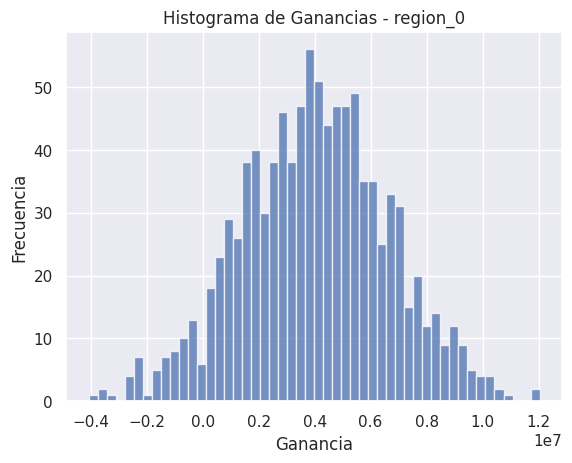


    Región: region_1
    Beneficio promedio: 4540832.61
    Intervalo de confianza del 95%: [638070.49, 8564848.33]
    Nivel de riesgo: 1.4000%
    


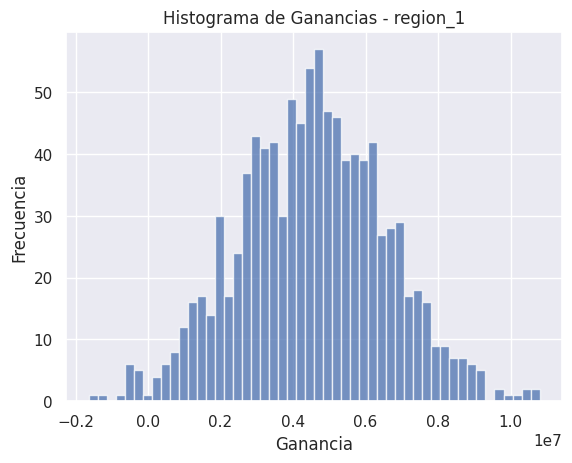


    Región: region_2
    Beneficio promedio: 3774321.59
    Intervalo de confianza del 95%: [-1410032.09, 8844590.54]
    Nivel de riesgo: 6.7000%
    


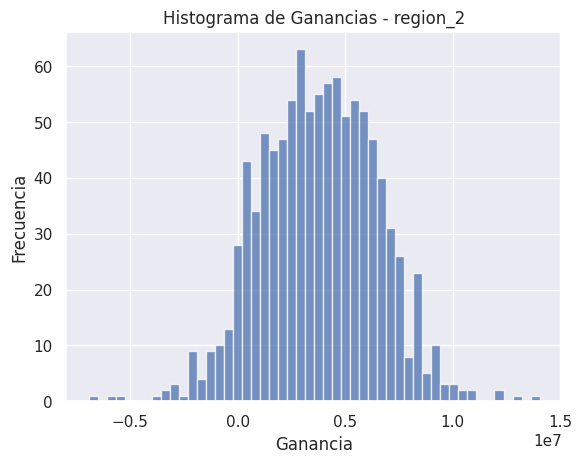

In [20]:
# Función para calcular las ganancias estimadas utilizando la función existente
def compute_gains(sample):
    sample_sorted = sample.sort_values(by='prediction', ascending=False).head(200)
    estimated_revenues = calcular_ganancias_por_region(sample_sorted)
    return estimated_revenues

# Parámetros
bootstrap_reps = 1000
bootstrap_size = 500

# Inicializar resultados
results = {}

# Cálculo para cada región
for region_name, df in zip(["region_0", "region_1", "region_2"], [valid_0, valid_1, valid_2]):
    region_gains = []
    
    for i in range(bootstrap_reps):
        bootstrap_sample = df.sample(n=bootstrap_size, replace=True)
        estimated_revenues = compute_gains(bootstrap_sample)
        region_gains.append(estimated_revenues)
    
    results[region_name] = {
        "gains": region_gains,
        "is_loss": [g < 0 for g in region_gains]
    }

# Calculamos el nivel de riesgo para cada región
for region in ["region_0", "region_1", "region_2"]:
    gains = results[region]["gains"]
    mean_gain = np.mean(gains)
    lower_bound = np.percentile(gains, 2.5)
    upper_bound = np.percentile(gains, 97.5)
    risk_level = sum(results[region]["is_loss"]) / len(results[region]["is_loss"])
    
    print(f"""
    Región: {region}
    Beneficio promedio: {mean_gain:.2f}
    Intervalo de confianza del 95%: [{lower_bound:.2f}, {upper_bound:.2f}]
    Nivel de riesgo: {risk_level:.4%}
    """)

    # Generar histograma
    plt.hist(gains, bins=50, alpha=0.75)
    plt.title(f'Histograma de Ganancias - {region}')
    plt.xlabel('Ganancia')
    plt.ylabel('Frecuencia')
    plt.show()


En base a los resultados obtenidos, podemos indicar que:

La Región 1 aparece bastante atractiva para el desarrollo de pozos petrolíferos debido a su mayor beneficio promedio, sin embargo tiene el mayor nivel de riesgo comparado con las otras dos regiones.

Por otro lado la Región 2, aunque tiene el menor beneficio promedio, también presenta el menor nivel de riesgo.

El nivel de riesgo puede ser muy relevante a la hora de definir en que región desarrollar la inversión. Considerando este aspecto, la Región 0 puede ser una buena alternativa si se busca un equilibrio entre ganancias esperadas y riesgo, debido a que tiene mayores ganancias que la región 2 y un riesgo mucho más bajo que la región 1. 

### Conclusión General. 

En este proyecto trabajamos con 3 conjuntos de datos de la compañía de extracción de petróleo OilyGiant. El objetivo era de determinar la mejor región donde abrir 200 pozos nuevos de petróleo. 

Para ello, después de descargar los datos, hemos ocupado un modelo de regresión lineal, con el cual hemos analizado las posibles ganancias en cada una de las regiones, ocupando para ello los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones. 

Basándonos sólo en ese análisis de ganancias potenciales, la Región 0 parece ser la opción más atractiva para el desarrollo de pozos petrolíferos, debido a que proporciona una ganancia potencial mayor que las otras dos regiones.

Posterior a eso hemos ocupado técnica del bootstrapping con 1000 muestras, calcular el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas.

En este último análisis, la Región 0 puede ser una buena alternativa si se busca un equilibrio entre ganancias esperadas y riesgo, debido a que tiene mayores gagancias que la región 2 y un riesgo mucho más bajo que la región 1.

En base a los resultados obtenidos, y considerando el alto monto de inversión y lo importante que es el nivel de riesgo en las decisiones de imversión, proponemos elegir la región 0 para el desarrollo de pozos petrolíferos.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Me parece que las conclusiones no coinciden con los resultados de ahora pero sí con los que venían tu notebook. No estoy seguro que ocurrió, pero creo que algo se modificó y al menos cuando yo reinició el kernel y ejecuto todo, se ve que la región 1 es la más promisoria. Sería bueno definir la 
    
Esto no es problema, mi única sugerencia es que uses algunas cifras al momento de comparar en las conclusiones, por ejemplo, si el riesgo es más bajo, mencionar cuántos puntos porcentuales más bajo es.    
</div>